## Import Requirement Library

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from shutil import copyfile
import matplotlib.pyplot as plt

## Extract dataset

In [2]:
zip_path = '.\data.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('data')
zip_ref.close()


In [3]:
import os

base_dir = 'data\data'
pet_dir = os.path.join(base_dir,'pet')
hdpe_botol_dir = os.path.join(base_dir,'hdpe_botol')
hdpe_tutup_botol_dir = os.path.join(base_dir,'hdpe_tutup_botol')
hdpe_container_dir = os.path.join(base_dir,'hdpe_container')
ldpe_bag_dir = os.path.join(base_dir,'ldpe_bag')
ldpe_botol_dir = os.path.join(base_dir,'ldpe_botol')
ps_dir = os.path.join(base_dir,'ps')
pp_botol_dir = os.path.join(base_dir,'pp_botol')
pp_container_dir = os.path.join(base_dir,'pp_container')
pp_sedotan_dir = os.path.join(base_dir,'pp_sedotan')
pp_tutup_botol_dir = os.path.join(base_dir,'pp_tutup_botol')
pvc_clear_dir = os.path.join(base_dir,'pvc_clear')
pvc_unclear_dir = os.path.join(base_dir,'pvc_unclear')
# other_dir = os.path.join(base_dir,'other')

print('Total file in pet dir {}'.format(len(os.listdir(pet_dir))))
print('Total file in hdpe botol dir {}'.format(len(os.listdir(hdpe_botol_dir))))
print('Total file in hdpe container dir {}'.format(len(os.listdir(hdpe_container_dir))))
print('Total file in hdpe tutup botol dir {}'.format(len(os.listdir(hdpe_tutup_botol_dir))))
print('Total file in ldpe bag dir {}'.format(len(os.listdir(ldpe_bag_dir))))
print('Total file in ldpe botol dir {}'.format(len(os.listdir(ldpe_botol_dir))))
print('Total file in ps dir {}'.format(len(os.listdir(ps_dir))))
print('Total file in pp botol dir {}'.format(len(os.listdir(pp_botol_dir))))
print('Total file in pp container dir {}'.format(len(os.listdir(pp_container_dir))))
print('Total file in pp sedotan dir {}'.format(len(os.listdir(pp_sedotan_dir))))
print('Total file in pp tutup botol dir {}'.format(len(os.listdir(pp_tutup_botol_dir))))
print('Total file in pvc clear dir {}'.format(len(os.listdir(pvc_clear_dir))))
print('Total file in pvc unclear dir {}'.format(len(os.listdir(pvc_unclear_dir))))
# print('Total file in other dir {}'.format(len(os.listdir(other_dir))))

pet_files= os.listdir(pet_dir)
print(pet_files[:10])

hdpe_botol_files= os.listdir(hdpe_botol_dir)
print(hdpe_botol_files[:10])

hdpe_tutup_botol_files= os.listdir(hdpe_tutup_botol_dir)
print(hdpe_tutup_botol_files[:10])

hdpe_container_files= os.listdir(hdpe_container_dir)
print(hdpe_container_files[:10])

ldpe_bag_files= os.listdir(ldpe_bag_dir)
print(ldpe_bag_files[:10])

ldpe_botol_files= os.listdir(ldpe_botol_dir)
print(ldpe_botol_files[:10])

ps_files= os.listdir(ps_dir)
print(ps_files[:10])

pp_botol_files= os.listdir(pp_botol_dir)
print(pp_botol_files[:10])

pp_container_files= os.listdir(pp_container_dir)
print(pp_container_files[:10])

pp_sedotan_files= os.listdir(pp_sedotan_dir)
print(pp_sedotan_files[:10])

pp_tutup_botol_files= os.listdir(pp_tutup_botol_dir)
print(pp_tutup_botol_files[:10])

pvc_clear_files= os.listdir(pvc_clear_dir)
print(pvc_clear_files[:10])

pvc_unclear_files= os.listdir(pvc_unclear_dir)
print(pvc_unclear_files[:10])

# other_files= os.listdir(other_dir)
# print(other_files[:10])


Total file in pet dir 270
Total file in hdpe botol dir 177
Total file in hdpe container dir 129
Total file in hdpe tutup botol dir 83
Total file in ldpe bag dir 161
Total file in ldpe botol dir 159
Total file in ps dir 247
Total file in pp botol dir 160
Total file in pp container dir 149
Total file in pp sedotan dir 30
Total file in pp tutup botol dir 100
Total file in pvc clear dir 156
Total file in pvc unclear dir 88
['0_35L-Spirit-Bottle-000843-scaled_1_11zon.png', '108-1086068_open-crushed-water-bottle-crushed-water-bottle-png_2_11zon.png', '360_F_498362712_7sJRmv7sOsfCtqieE0wtIjUpdUBvF4PY_3_11zon.png', '46726744-crushed-plastic-bottle-isolated-on-white_5_11zon.png', '93850_b88c6b47-8459-46b7-82bc-f28c774af031_4_11zon.png', 'crushed-plastic-bottle-10801423_7_11zon.png', 'crushed-plastic-bottle-isolated-on-white-2GK474W_8_11zon.png', 'crushedemptyplasticbottlebluewithcapmb3dmodel001_6_11zon.png', 'empty-pet-bottle-500x500_9_11zon.png', 'front-view-empty-pet-plastic-green-bottle-isol

## Visualize some dataset

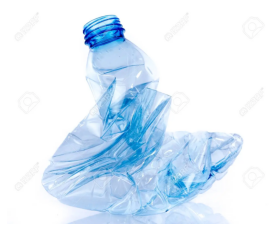

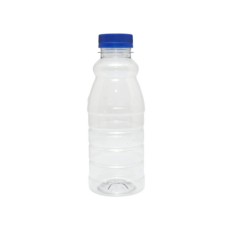

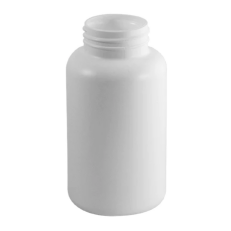

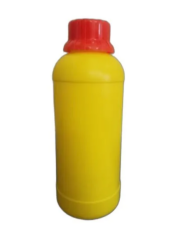

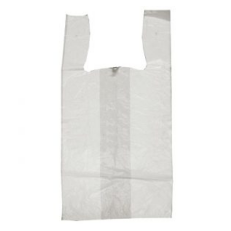

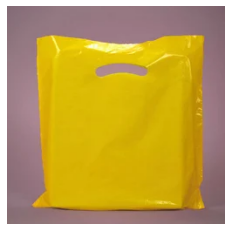

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_pet = [os.path.join(pet_dir, fname) for fname in pet_files[pic_index-2:pic_index]]
next_hdpe_botol = [os.path.join(hdpe_botol_dir, fname)for fname in hdpe_botol_files[pic_index-2:pic_index]]
next_ldpe_bag = [os.path.join(ldpe_bag_dir, fname) for fname in ldpe_bag_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_pet+next_hdpe_botol+next_ldpe_bag):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



## Create Train and Val Directory

In [5]:
root_dir = './data/tmp_dataset'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path,'validation'))
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','ldpe_botol'))    
    os.makedirs(os.path.join(root_path,'validation','ldpe_bag'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_botol'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_container'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_tutup_botol'))    
    os.makedirs(os.path.join(root_path,'validation','ps'))    
    os.makedirs(os.path.join(root_path,'validation','pp_botol'))
    os.makedirs(os.path.join(root_path,'validation','pp_container'))
    os.makedirs(os.path.join(root_path,'validation','pp_sedotan'))
    os.makedirs(os.path.join(root_path,'validation','pp_tutup_botol'))
    os.makedirs(os.path.join(root_path,'validation','pvc_clear'))        
    os.makedirs(os.path.join(root_path,'validation','pvc_unclear'))        
    os.makedirs(os.path.join(root_path,'validation','other')) 
    
    os.makedirs(os.path.join(root_path,'training'))
    os.makedirs(os.path.join(root_path,'training','pet'))
    os.makedirs(os.path.join(root_path,'training','ldpe_botol'))    
    os.makedirs(os.path.join(root_path,'training','ldpe_bag'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_botol'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_container'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_tutup_botol'))    
    os.makedirs(os.path.join(root_path,'training','ps'))    
    os.makedirs(os.path.join(root_path,'training','pp_botol'))
    os.makedirs(os.path.join(root_path,'training','pp_container'))
    os.makedirs(os.path.join(root_path,'training','pp_sedotan'))
    os.makedirs(os.path.join(root_path,'training','pp_tutup_botol'))
    os.makedirs(os.path.join(root_path,'training','pvc_clear'))        
    os.makedirs(os.path.join(root_path,'training','pvc_unclear'))        
    os.makedirs(os.path.join(root_path,'training','other'))  

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./data/tmp_dataset\training
./data/tmp_dataset\validation
./data/tmp_dataset\training\hdpe_botol
./data/tmp_dataset\training\hdpe_container
./data/tmp_dataset\training\hdpe_tutup_botol
./data/tmp_dataset\training\ldpe_bag
./data/tmp_dataset\training\ldpe_botol
./data/tmp_dataset\training\other
./data/tmp_dataset\training\pet
./data/tmp_dataset\training\pp_botol
./data/tmp_dataset\training\pp_container
./data/tmp_dataset\training\pp_sedotan
./data/tmp_dataset\training\pp_tutup_botol
./data/tmp_dataset\training\ps
./data/tmp_dataset\training\pvc_clear
./data/tmp_dataset\training\pvc_unclear
./data/tmp_dataset\validation\hdpe_botol
./data/tmp_dataset\validation\hdpe_container
./data/tmp_dataset\validation\hdpe_tutup_botol
./data/tmp_dataset\validation\ldpe_bag
./data/tmp_dataset\validation\ldpe_botol
./data/tmp_dataset\validation\other
./data/tmp_dataset\validation\pet
./data/tmp_dataset\validation\pp_botol
./data/tmp_dataset\validation\pp_container
./data/tmp_dataset\validation\pp_sedota

In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    len_source_dir = len(os.listdir(SOURCE_DIR))
    len_split_file = round(len_source_dir * SPLIT_SIZE)
    shuffle_file = random.sample(os.listdir(SOURCE_DIR), len_source_dir)
    
    for fname in shuffle_file[:len_split_file]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(TRAINING_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    for fname in shuffle_file[len_split_file:]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(VALIDATION_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    ## END CODE HERE
    return shuffle_file

In [8]:
PET_SOURCE_DIR = "./data/data/pet"
LDPE_BOTOL_SOURCE_DIR = "./data/data/ldpe_botol"
LDPE_BAG_SOURCE_DIR = "./data/data/ldpe_bag"
HDPE_BOTOL_SOURCE_DIR = "./data/data/hdpe_botol"
HDPE_TUTUP_BOTOL_SOURCE_DIR = "./data/data/hdpe_tutup_botol"
HDPE_CONTAINER_SOURCE_DIR = "./data/data/hdpe_container"
PS_SOURCE_DIR = "./data/data/ps"
PP_BOTOL_SOURCE_DIR = "./data/data/pp_botol"
PP_CONTAINER_SOURCE_DIR = "./data/data/pp_container"
PP_SEDOTAN_SOURCE_DIR = "./data/data/pp_sedotan"
PP_TUTUP_BOTOL_SOURCE_DIR = "./data/data/pp_tutup_botol"
PVC_CLEAR_SOURCE_DIR = "./data/data/pvc_clear"
PVC_UNCLEAR_SOURCE_DIR = "./data/data/pvc_unclear"
# OTHER_SOURCE_DIR = "./data/data/other"

TRAINING_DIR = "./data/tmp_dataset/training"
VALIDATION_DIR = "./data/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_botol/")
VALIDATION_HDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_botol/")

TRAINING_HDPE_CONTAINER_DIR = os.path.join(TRAINING_DIR,"hdpe_container/")
VALIDATION_HDPE_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"hdpe_container/")

TRAINING_HDPE_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_tutup_botol/")
VALIDATION_HDPE_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_tutup_botol/")

TRAINING_LDPE_BAG_DIR = os.path.join(TRAINING_DIR,"ldpe_bag/")
VALIDATION_LDPE_BAG_DIR = os.path.join(VALIDATION_DIR,"ldpe_bag/")

TRAINING_LDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"ldpe_botol/")
VALIDATION_LDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"ldpe_botol/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_botol/")
VALIDATION_PP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_botol/")

TRAINING_PP_CONTAINER_DIR = os.path.join(TRAINING_DIR,"pp_container/")
VALIDATION_PP_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"pp_container/")

TRAINING_PP_SEDOTAN_DIR = os.path.join(TRAINING_DIR,"pp_sedotan/")
VALIDATION_PP_SEDOTAN_DIR = os.path.join(VALIDATION_DIR,"pp_sedotan/")

TRAINING_PP_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_tutup_botol/")
VALIDATION_PP_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_tutup_botol/")

TRAINING_PVC_CLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_clear/")
VALIDATION_PVC_CLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_clear/")

TRAINING_PVC_UNCLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_unclear/")
VALIDATION_PVC_UNCLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_unclear/")


# TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
# VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

split_size = .9

pet = split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
ldpe_botol = split_data(LDPE_BOTOL_SOURCE_DIR, TRAINING_LDPE_BOTOL_DIR, VALIDATION_LDPE_BOTOL_DIR, split_size)
ldpe_bag = split_data(LDPE_BAG_SOURCE_DIR, TRAINING_LDPE_BAG_DIR, VALIDATION_LDPE_BAG_DIR, split_size)
hdpe_botol = split_data(HDPE_BOTOL_SOURCE_DIR, TRAINING_HDPE_BOTOL_DIR, VALIDATION_HDPE_BOTOL_DIR, split_size)
hdpe_tutup_botol = split_data(HDPE_TUTUP_BOTOL_SOURCE_DIR, TRAINING_HDPE_TUTUP_BOTOL_DIR, VALIDATION_HDPE_TUTUP_BOTOL_DIR, split_size)
hdpe_container = split_data(HDPE_CONTAINER_SOURCE_DIR, TRAINING_HDPE_CONTAINER_DIR, VALIDATION_HDPE_CONTAINER_DIR, split_size)
ps = split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
pp_botol = split_data(PP_BOTOL_SOURCE_DIR, TRAINING_PP_BOTOL_DIR, VALIDATION_PP_BOTOL_DIR, split_size)
pp_container = split_data(PP_CONTAINER_SOURCE_DIR, TRAINING_PP_CONTAINER_DIR, VALIDATION_PP_CONTAINER_DIR, split_size)
pp_sedotan = split_data(PP_SEDOTAN_SOURCE_DIR, TRAINING_PP_SEDOTAN_DIR, VALIDATION_PP_SEDOTAN_DIR, split_size)
pp_tutup_botol = split_data(PP_TUTUP_BOTOL_SOURCE_DIR, TRAINING_PP_TUTUP_BOTOL_DIR, VALIDATION_PP_TUTUP_BOTOL_DIR, split_size)
pvc_clear = split_data(PVC_CLEAR_SOURCE_DIR, TRAINING_PVC_CLEAR_DIR, VALIDATION_PVC_CLEAR_DIR, split_size)
pvc_unclear = split_data(PVC_UNCLEAR_SOURCE_DIR, TRAINING_PVC_UNCLEAR_DIR, VALIDATION_PVC_UNCLEAR_DIR, split_size)
# other = split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(pet)

['pet_128.png', 'pet_147.png', 'crushedemptyplasticbottlebluewithcapmb3dmodel001_6_11zon.png', 'pet_232.png', 'pet_82.png', 'pet_135.png', 'pet_120.png', 'pet_49.png', '360_F_498362712_7sJRmv7sOsfCtqieE0wtIjUpdUBvF4PY_3_11zon.png', 'pet_52.png', 'pet_124.png', 'istockphoto-1295052141-612x612_15_11zon.png', 'pet_85.png', 'pet_106.png', 'pet_42.png', 'pet_159.png', 'pet_139.png', 'pet_102.png', 'pet_249.png', 'pet_54.png', 'pet_33.png', 'pet_138.png', 'pet_205.png', 'pet_119.png', 'pet_167.png', 'pet_180.png', '108-1086068_open-crushed-water-bottle-crushed-water-bottle-png_2_11zon.png', 'pet_43.png', 'pet_46.png', 'pet_178.png', 'pet_170.png', 'pet_19.png', 'pet_136.png', 'pet_220.png', 'pet_151.png', 'Pet-Bottle-60ml-1-814x814_16_11zon.png', 'pet_48.png', 'pet_145.png', '46726744-crushed-plastic-bottle-isolated-on-white_5_11zon.png', 'pet_248.png', 'pet_64.png', 'pet_17.png', 'pet_56.png', 'pet_198.png', 'pet_22.png', 'pet_89.png', 'pet_137.png', 'pet_98.png', 'pet_105.png', 'pet_44.png

In [9]:
# Test your split_data function
PET_SOURCE_DIR = "./data/data/pet"
LDPE_BOTOL_SOURCE_DIR = "./data/data/ldpe_botol"
LDPE_BAG_SOURCE_DIR = "./data/data/ldpe_bag"
HDPE_BOTOL_SOURCE_DIR = "./data/data/hdpe_botol"
HDPE_TUTUP_BOTOL_SOURCE_DIR = "./data/data/hdpe_tutup_botol"
HDPE_CONTAINER_SOURCE_DIR = "./data/data/hdpe_container"
PS_SOURCE_DIR = "./data/data/ps"
PP_BOTOL_SOURCE_DIR = "./data/data/pp_botol"
PP_CONTAINER_SOURCE_DIR = "./data/data/pp_container"
PP_SEDOTAN_SOURCE_DIR = "./data/data/pp_sedotan"
PP_TUTUP_BOTOL_SOURCE_DIR = "./data/data/pp_tutup_botol"
PVC_CLEAR_SOURCE_DIR = "./data/data/pvc_clear"
PVC_UNCLEAR_SOURCE_DIR = "./data/data/pvc_unclear"
# OTHER_SOURCE_DIR = "./data/data/other"

TRAINING_DIR = "./data/tmp_dataset/training"
VALIDATION_DIR = "./data/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_botol/")
VALIDATION_HDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_botol/")

TRAINING_HDPE_CONTAINER_DIR = os.path.join(TRAINING_DIR,"hdpe_container/")
VALIDATION_HDPE_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"hdpe_container/")

TRAINING_HDPE_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_tutup_botol/")
VALIDATION_HDPE_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_tutup_botol/")

TRAINING_LDPE_BAG_DIR = os.path.join(TRAINING_DIR,"ldpe_bag/")
VALIDATION_LDPE_BAG_DIR = os.path.join(VALIDATION_DIR,"ldpe_bag/")

TRAINING_LDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"ldpe_botol/")
VALIDATION_LDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"ldpe_botol/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_botol/")
VALIDATION_PP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_botol/")

TRAINING_PP_CONTAINER_DIR = os.path.join(TRAINING_DIR,"pp_container/")
VALIDATION_PP_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"pp_container/")

TRAINING_PP_SEDOTAN_DIR = os.path.join(TRAINING_DIR,"pp_sedotan/")
VALIDATION_PP_SEDOTAN_DIR = os.path.join(VALIDATION_DIR,"pp_sedotan/")

TRAINING_PP_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_tutup_botol/")
VALIDATION_PP_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_tutup_botol/")

TRAINING_PVC_CLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_clear/")
VALIDATION_PVC_CLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_clear/")

TRAINING_PVC_UNCLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_unclear/")
VALIDATION_PVC_UNCLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_unclear/")

# print(TRAINING_OTHER_DIR)
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_PET_DIR)) > 0:
    for file in os.scandir(TRAINING_PET_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_CONTAINER_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_BAG_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_BAG_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PS_DIR)) > 0:
    for file in os.scandir(TRAINING_PS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_CONTAINER_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_SEDOTAN_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_SEDOTAN_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_CLEAR_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_CLEAR_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_UNCLEAR_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_UNCLEAR_DIR):
        os.remove(file.path)
# if len(os.listdir(TRAINING_OTHER_DIR)) > 0:
#     for file in os.scandir(TRAINING_OTHER_DIR):
#         os.remove(file.path)
        
if len(os.listdir(VALIDATION_PET_DIR)) > 0:
    for file in os.scandir(VALIDATION_PET_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_CONTAINER_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_BAG_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_BAG_DIR):
        os.remove(file.path)        
if len(os.listdir(VALIDATION_PS_DIR)) > 0:
    for file in os.scandir(VALIDATION_PS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_CONTAINER_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_SEDOTAN_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_SEDOTAN_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_CLEAR_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_CLEAR_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_UNCLEAR_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_UNCLEAR_DIR):
        os.remove(file.path)
# if len(os.listdir(VALIDATION_OTHER_DIR)) > 0:
#     for file in os.scandir(VALIDATION_OTHER_DIR):
#         os.remove(file.path)

# Define proportion of images used for training
split_size = .7

split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
split_data(LDPE_BOTOL_SOURCE_DIR, TRAINING_LDPE_BOTOL_DIR, VALIDATION_LDPE_BOTOL_DIR, split_size)
split_data(LDPE_BAG_SOURCE_DIR, TRAINING_LDPE_BAG_DIR, VALIDATION_LDPE_BAG_DIR, split_size)
split_data(HDPE_BOTOL_SOURCE_DIR, TRAINING_HDPE_BOTOL_DIR, VALIDATION_HDPE_BOTOL_DIR, split_size)
split_data(HDPE_TUTUP_BOTOL_SOURCE_DIR, TRAINING_HDPE_TUTUP_BOTOL_DIR, VALIDATION_HDPE_TUTUP_BOTOL_DIR, split_size)
split_data(HDPE_CONTAINER_SOURCE_DIR, TRAINING_HDPE_CONTAINER_DIR, VALIDATION_HDPE_CONTAINER_DIR, split_size)
split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
split_data(PP_BOTOL_SOURCE_DIR, TRAINING_PP_BOTOL_DIR, VALIDATION_PP_BOTOL_DIR, split_size)
split_data(PP_CONTAINER_SOURCE_DIR, TRAINING_PP_CONTAINER_DIR, VALIDATION_PP_CONTAINER_DIR, split_size)
split_data(PP_SEDOTAN_SOURCE_DIR, TRAINING_PP_SEDOTAN_DIR, VALIDATION_PP_SEDOTAN_DIR, split_size)
split_data(PP_TUTUP_BOTOL_SOURCE_DIR, TRAINING_PP_TUTUP_BOTOL_DIR, VALIDATION_PP_TUTUP_BOTOL_DIR, split_size)
split_data(PVC_CLEAR_SOURCE_DIR, TRAINING_PVC_CLEAR_DIR, VALIDATION_PVC_CLEAR_DIR, split_size)
split_data(PVC_UNCLEAR_SOURCE_DIR, TRAINING_PVC_UNCLEAR_DIR, VALIDATION_PVC_UNCLEAR_DIR, split_size)

print(f"\n\nOriginal pet's directory has {len(os.listdir(PET_SOURCE_DIR))} images")
print(f"Original hdpe botol's directory has {len(os.listdir(HDPE_BOTOL_SOURCE_DIR))} images\n")
print(f"Original hdpe container's directory has {len(os.listdir(HDPE_CONTAINER_SOURCE_DIR))} images\n")
print(f"Original hdpe tutup botol 's directory has {len(os.listdir(HDPE_TUTUP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original ldpe botol's directory has {len(os.listdir(LDPE_BOTOL_SOURCE_DIR))} images\n")
print(f"Original ldpe bag's directory has {len(os.listdir(LDPE_BAG_SOURCE_DIR))} images\n")
print(f"Original ps's directory has {len(os.listdir(PS_SOURCE_DIR))} images\n")
print(f"Original pp botol's directory has {len(os.listdir(PP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original pp container's directory has {len(os.listdir(PP_CONTAINER_SOURCE_DIR))} images\n")
print(f"Original pp sedotan's directory has {len(os.listdir(PP_SEDOTAN_SOURCE_DIR))} images\n")
print(f"Original pp tutup botol's directory has {len(os.listdir(PP_TUTUP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original pvc clear's directory has {len(os.listdir(PVC_CLEAR_SOURCE_DIR))} images\n")
print(f"Original pvc unclear's directory has {len(os.listdir(PVC_UNCLEAR_SOURCE_DIR))} images\n")
# print(f"Original other's directory has {len(os.listdir(OTHER_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_PET_DIR))} images of PET for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_BOTOL_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_TUTUP_BOTOL_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_CONTAINER_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_BAG_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_BOTOL_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_PS_DIR))} images of PS for training")
print(f"There are {len(os.listdir(TRAINING_PP_BOTOL_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_CONTAINER_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_SEDOTAN_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_TUTUP_BOTOL_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PVC_CLEAR_DIR))} images of PVC for training")
print(f"There are {len(os.listdir(TRAINING_PVC_UNCLEAR_DIR))} images of PVC for training")
# print(f"There are {len(os.listdir(TRAINING_OTHER_DIR))} images of OTHER for training")

print(f"There are {len(os.listdir(VALIDATION_PET_DIR))} images of PET for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_BOTOL_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_TUTUP_BOTOL_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_CONTAINER_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_BAG_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_BOTOL_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PS_DIR))} images of PS for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_BOTOL_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_TUTUP_BOTOL_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_CONTAINER_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_SEDOTAN_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_CLEAR_DIR))} images of PVC for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_UNCLEAR_DIR))} images of PVC for VALIDATION")
# print(f"There are {len(os.listdir(VALIDATION_OTHER_DIR))} images of OTHER for VALIDATION")




Original pet's directory has 270 images
Original hdpe botol's directory has 177 images

Original hdpe container's directory has 129 images

Original hdpe tutup botol 's directory has 83 images

Original ldpe botol's directory has 159 images

Original ldpe bag's directory has 161 images

Original ps's directory has 247 images

Original pp botol's directory has 160 images

Original pp container's directory has 149 images

Original pp sedotan's directory has 30 images

Original pp tutup botol's directory has 100 images

Original pvc clear's directory has 156 images

Original pvc unclear's directory has 88 images

There are 189 images of PET for training
There are 124 images of HDPE for training
There are 58 images of HDPE for training
There are 90 images of HDPE for training
There are 113 images of LDPE for training
There are 111 images of LDPE for training
There are 173 images of PS for training
There are 112 images of PP for training
There are 104 images of PP for training
There are 2

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')  
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                              batch_size=45,
                                              class_mode='binary',
                                              target_size=(150, 150))
    validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')  
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=45,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
    return train_generator,validation_generator

In [11]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

print(TRAINING_DIR)
label_map = (train_generator.class_indices)
print(label_map)

Found 1336 images belonging to 14 classes.
Found 573 images belonging to 14 classes.
./data/tmp_dataset/training
{'hdpe_botol': 0, 'hdpe_container': 1, 'hdpe_tutup_botol': 2, 'ldpe_bag': 3, 'ldpe_botol': 4, 'other': 5, 'pet': 6, 'pp_botol': 7, 'pp_container': 8, 'pp_sedotan': 9, 'pp_tutup_botol': 10, 'ps': 11, 'pvc_clear': 12, 'pvc_unclear': 13}


In [12]:
x,y = next(train_generator)
x.shape # input shape of one record is (331,331,3) , 32: is the batch size

(45, 150, 150, 3)

In [14]:
import tensorflow as tf
IMG_SHAPE = (150, 150,3)
base_model = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# Print the model summary
base_model.summary()



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [15]:
base_model.trainable = False

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [17]:
prediction_layer = tf.keras.layers.Dense(14,activation='softmax')

In [18]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    prediction_layer
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [22]:
batch_size=45
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

In [23]:
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
len(model.trainable_variables)

8

In [25]:
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early])

Epoch 1/25
21/29 [====================>.........] - ETA: 8s - loss: 2.5604 - accuracy: 0.1740

G:\Anaconda\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 54s 2s/step - loss: 2.5254 - accuracy: 0.1867 - val_loss: 2.2217 - val_accuracy: 0.2981
Epoch 2/25
29/29 [==============================] - 49s 2s/step - loss: 2.1975 - accuracy: 0.3184 - val_loss: 1.9501 - val_accuracy: 0.3981
Epoch 3/25
29/29 [==============================] - 49s 2s/step - loss: 1.9504 - accuracy: 0.3734 - val_loss: 1.7243 - val_accuracy: 0.5019
Epoch 4/25
29/29 [==============================] - 46s 2s/step - loss: 1.7418 - accuracy: 0.4454 - val_loss: 1.5316 - val_accuracy: 0.5204
Epoch 5/25
29/29 [==============================] - 47s 2s/step - loss: 1.6158 - accuracy: 0.4826 - val_loss: 1.4442 - val_accuracy: 0.5204
Epoch 6/25
29/29 [==============================] - 49s 2s/step - loss: 1.4347 - accuracy: 0.5445 - val_loss: 1.3577 - val_accuracy: 0.5426
Epoch 7/25
29/29 [==============================] - 49s 2s/step - loss: 1.3978 - accuracy: 0.5275 - val_loss: 1.2587 - val_accuracy: 0.5796
Epoch 8/25
29/29 [=============

In [26]:
accuracy_score = model.evaluate(train_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

30/30 [==============================] - 32s 1s/step - loss: 0.5425 - accuracy: 0.8189
[0.5424870252609253, 0.81886225938797]
Accuracy: 81.8862%
Loss:  0.5424870252609253


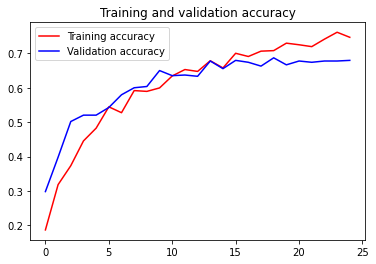

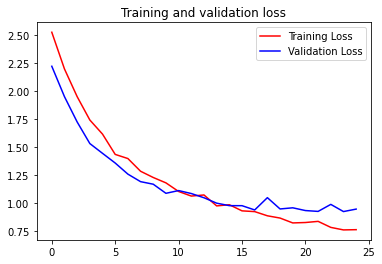

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
!pip install ipywidgets
!pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


FileUpload(value={}, description='Upload')

Button(description='Upload', style=ButtonStyle())

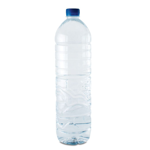

1/1 [==============================] - 1s 674ms/step
Filename: FC-Botol-Air-1500ml-e1644223484581.jpg
[[0.08302612 0.23015732 0.01988796 0.01970753 0.02612646 0.00043848
  0.0515523  0.06656087 0.0036618  0.10283791 0.02720829 0.07867387
  0.06514381 0.22501731]], category: 1, label: hdpe_container


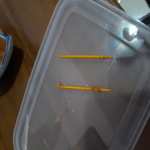

1/1 [==============================] - 0s 33ms/step
Filename: VYBB9919.JPG
[[0.10634658 0.02987681 0.02331319 0.00152671 0.01694501 0.00057858
  0.02096175 0.0490814  0.0041006  0.06958348 0.07208757 0.09424444
  0.2298084  0.2815454 ]], category: 13, label: pvc_unclear


In [31]:
from IPython.display import display
import ipywidgets as widgets
import io
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array, load_img

upload_widget = widgets.FileUpload()
display(upload_widget)

def on_upload_button_clicked(change):
    uploaded_image = upload_widget.value[list(upload_widget.value.keys())[0]]['content']
    pil_image = Image.open(io.BytesIO(uploaded_image))
    resized_image = pil_image.resize((150, 150))

    display(resized_image)

    x = img_to_array(resized_image)

    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    filename = list(upload_widget.value.keys())[0]
    print("Filename:", filename)
#     print("Classes:", classes)
    label_name = list(filter(lambda x: train_generator.class_indices[x] == np.argmax(classes), train_generator.class_indices))[0]
    print( f"{classes}, category: {np.argmax(classes)}, label: {label_name}")

upload_button = widgets.Button(description="Upload")
upload_button.on_click(on_upload_button_clicked)

# Display the button
display(upload_button)


In [30]:
label_map = (train_generator.class_indices)
print(label_map)

{'hdpe_botol': 0, 'hdpe_container': 1, 'hdpe_tutup_botol': 2, 'ldpe_bag': 3, 'ldpe_botol': 4, 'other': 5, 'pet': 6, 'pp_botol': 7, 'pp_container': 8, 'pp_sedotan': 9, 'pp_tutup_botol': 10, 'ps': 11, 'pvc_clear': 12, 'pvc_unclear': 13}


# EXPORT TFLITE

In [ ]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)


In [ ]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations =[optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)